In [2]:
import pandas as pd
import numpy as np
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

In [12]:
df1 = pd.read_csv(r"C:\Dev\Machine Learning\Dataset\bensin.csv")
print(df1)
print(df1.describe())
#Memisahkan traning data dan test data
liter = df1[["Liter"]]
kilometer = df1[["Kilometer"]]
X_train, X_test, y_train, y_test = ms.train_test_split(liter,kilometer, test_size=0.2, random_state=0)
print(X_train.size, X_test.size)

    Liter  Kilometer
0      20      142.0
1      25      177.0
2      20      144.0
3      30      203.0
4      40      273.0
..    ...        ...
60     31      203.0
61     37      241.0
62     23      142.0
63     36      241.0
64     23      142.0

[65 rows x 2 columns]
           Liter   Kilometer
count  65.000000   65.000000
mean   26.446154  181.064615
std     7.424686   49.741763
min     6.000000   32.000000
25%    23.000000  144.000000
50%    25.000000  177.000000
75%    30.000000  212.000000
max    45.000000  278.000000
52 13


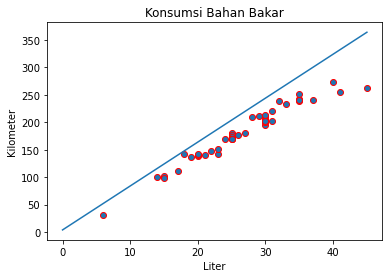

In [15]:
#Visualisai
plt.scatter(X_train, y_train, edgecolors="red")
plt.xlabel("Liter")
plt.ylabel("Kilometer")
plt.title("Konsumsi Bahan Bakar")
#Regression line
x1 = np.linspace(0,45)
y1 = 4 + (8*x1) #Coba-coba dulu, cara manual. Dari persamaan umum y = ax + b
plt.plot(x1,y1)
plt.show()

Slope = [[6.45829591]]
Intercept= [10.64122249]


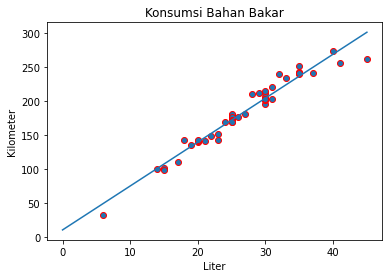

In [16]:
#Melatih model
model1 = lm.LinearRegression()
model1.fit(X_train, y_train)
print("Slope =", model1.coef_)
print("Intercept=",model1.intercept_)

#Visualisai
plt.scatter(X_train, y_train, edgecolors="red")
plt.xlabel("Liter")
plt.ylabel("Kilometer")
plt.title("Konsumsi Bahan Bakar")

#Regression line
x1 = np.linspace(0,45)
y1 = 10.64 + (6.45*x1)
plt.plot(x1,y1)
plt.show()

In [17]:
#Scoring model
r1 = model1.score(X_test, y_test)
print(r1)

jarak = model1.predict([[60]])
print(jarak)

prediksi = model1.predict(X_test)
print(prediksi)
print("\n", y_test)

0.9798523775622333
[[398.13897723]]
[[107.51566118]
 [172.0986203 ]
 [172.0986203 ]
 [159.18202848]
 [139.80714074]
 [268.97305898]
 [204.39009986]
 [236.68157942]
 [ 75.22418162]
 [243.13987534]
 [172.0986203 ]
 [139.80714074]
 [191.47350804]]

     Kilometer
45      102.0
29      167.0
43      177.0
62      142.0
34      144.0
33      278.0
31      211.0
40      241.0
26       65.0
63      241.0
22      166.2
2       144.0
11      180.0


              Liter  Penumpang    Bagasi  Kecepatan      Suhu  Kilometer
Liter      1.000000  -0.087997  0.097560   0.109370  0.079470   0.700815
Penumpang -0.087997   1.000000  0.081542   0.111942 -0.039954  -0.034175
Bagasi     0.097560   0.081542  1.000000   0.082096 -0.049363  -0.023318
Kecepatan  0.109370   0.111942  0.082096   1.000000 -0.009752   0.042819
Suhu       0.079470  -0.039954 -0.049363  -0.009752  1.000000   0.136657
Kilometer  0.700815  -0.034175 -0.023318   0.042819  0.136657   1.000000 

Intercept = [71.89241946]
Slope = [[ 6.54072143  2.99204736  2.45423995 -3.21123461]]
[[138.07882573]]
0.6822990991636211


ValueError: x and y must be the same size

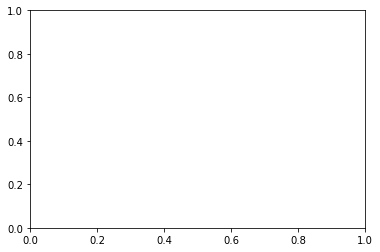

In [20]:
#Multiple linear regression
df2 = pd.read_csv(r"C:\Dev\Machine Learning\Dataset\bensin2.csv")
print(df2.corr(method="pearson"),"\n")
model2 = lm.LinearRegression()

X = df2[["Liter", "Penumpang", "Suhu", "Kecepatan"]]
y = df2[["Kilometer"]]
X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size=0.1, random_state=0)
model2.fit(X_train, y_train)

print("Intercept =", model2.intercept_)
print("Slope =", model2.coef_)

data1 = np.array([[30,2,10,50]]) #Misalkan data yang dimasukkan, tentukan berapa kilometer
hasil = model2.predict(data1)
print(hasil)

r2 = model2.score(X_test, y_test)
print(r2)